In [1]:
!pip install pint

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

print('If this cell runs successfully, it produces no output other than this message.')

     |████████████████████████████████| 143kB 3.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
modsim.py depends on Python 3.6 features.


If this cell runs successfully, it produces no output other than this message.


In [12]:
def bike_to_wellesley(state):
    if state.olin == 0:
        state.olin_empty+=1
        return
    state.olin -= 1
    state.wellesley += 1
    state.wellesley_money+=10
    state.total_money+=10
    
def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty+=1
        return
    state.wellesley -= 1
    state.olin += 1
    state.olin_money+=10
    state.total_money+=10

In [9]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if (state.olin_empty != 0 and state.wellesley_empty != 0):
        if state.t_first_empty == -1:
            state.t_first_empty = clock
    if flip(p1):
        bike_to_wellesley(state)
        state.clock +=1
    
    if flip(p2):
        bike_to_olin(state)
        state.clock +=1


In [59]:
def run_simulation(state, p1, p2, num_steps, num_bikes):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of a bike moving from Olin -> Wellesley
    p2: probability of a bike moving from Wellesley -> Olin
    num_steps: number of time steps
    """
    state.olin= (num_bikes/2) + 1
    state.wellesley= (num_bikes/2) - 1
    results = TimeSeries()    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = state.total_money
        
    # plot(results, label='Money')

In [76]:
sweep = SweepSeries()
bikeshare = State(olin= 10, wellesley= 2, 
                  olin_empty=0, wellesley_empty=0,
                  clock=0, olin_money = 0, wellesley_money = 0, total_money = 0, t_first_empty = 0)

,values
wellesley_empty,0
total_money,0
olin,10
t_first_empty,0
clock,0
olin_money,0
wellesley,2
olin_empty,0
wellesley_money,0


In [80]:
number_of_bikes = linspace(10, 100, 10)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

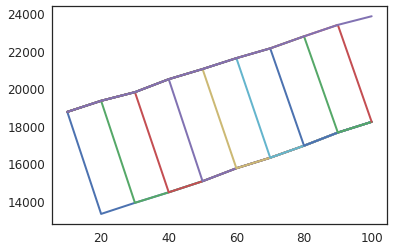

In [81]:
for x in number_of_bikes:
    state = run_simulation(bikeshare, 0.6, 0.4, 60,int(x))
    sweep[x] = bikeshare.total_money
    plot(sweep, label = 'bikeshare.olin_money')

In [72]:
bikeshare

,values
wellesley_empty,0
total_money,11290
olin,44
t_first_empty,0
clock,1159
olin_money,4690
wellesley,56
olin_empty,30
wellesley_money,6600
